In [76]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['mydatabase']
collection = db['mycollection']

documents = []
db_timestamps = []

for document in collection.find():
    documents.append(document)
    db_timestamps.append(document['db_timestamp'])

len(list(set(db_timestamps)))

72

In [77]:
# Convert json to df
import pandas as pd
df = pd.DataFrame(documents)

# parameters

df[['parameterName', 'parameterId']].head(30)

df[df['parameterName'].str.contains('comp', case=False)]


,_id,category,parameterId,parameterName,parameterUnit,writable,timestamp,value,strVal,smartHomeCategories,minValue,maxValue,stepValue,enumValues,scaleValue,zoneId,db_timestamp
62,67ceb1d718182a4cff873b4d,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T10:33:10.741707
423,67ceb21418182a4cff873cb6,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T10:34:11.784479
784,67ceb25218182a4cff873e1f,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T10:35:12.737904
1145,67ceb28f18182a4cff873f88,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T10:36:14.332826
1506,67ceb2cd18182a4cff8740f1,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T10:37:16.211374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24249,67cec8b10f201b6e4f61da34,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T12:10:40.646849
24610,67cecb0a0f201b6e4f61db9d,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T12:20:41.412206
24971,67cecd630f201b6e4f61dd06,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T12:30:42.312568
25332,67cecfbc0f201b6e4f61de6f,F750 CU 3x400V,47206,start compressor,DM,True,2025-03-08T21:17:00+00:00,-60.0,-60DM,[],-1000.0,-30.0,10.0,[],1,None,2025-03-10T12:40:43.305542


In [78]:
# Convert json to df
import pandas as pd
df = pd.DataFrame(documents)

parameterID = '47206'

df_filtered = df[df['parameterId'] == parameterID]

cols = ['parameterName', 'timestamp', 'value']

df_filtered = df_filtered[cols]

#convert timestamp to datetime
df_filtered['timestamp_localtime'] = pd.to_datetime(df_filtered['timestamp']).dt.tz_convert('Europe/Stockholm')

df_filtered.drop_duplicates()

,parameterName,timestamp,value,timestamp_localtime
62,start compressor,2025-03-08T21:17:00+00:00,-60.0,2025-03-08 22:17:00+01:00


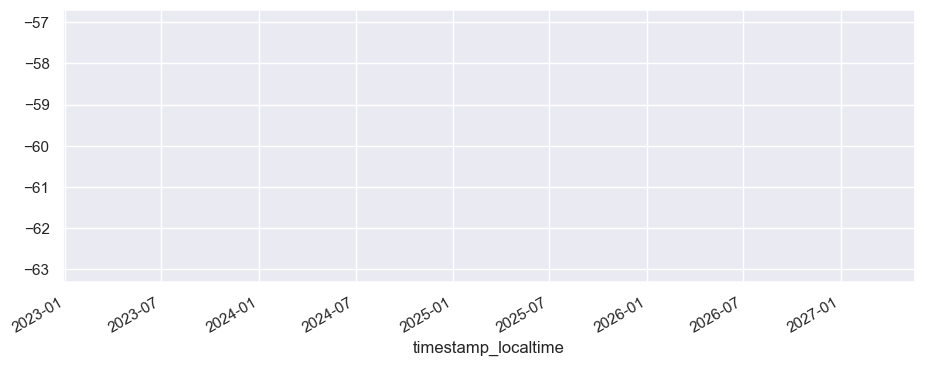

In [79]:
# Make a plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
df_filtered.set_index('timestamp_localtime').value.plot()
plt.show()


